In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('../Dataset/Loan Eligibility/loan-train.csv')
test_df = pd.read_csv('../Dataset/Loan Eligibility/loan-test.csv')

In [3]:
train_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
train_original=train_df.copy()
test_original=test_df.copy()

In [5]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Filling Missing Values with Visulatization and EDA 

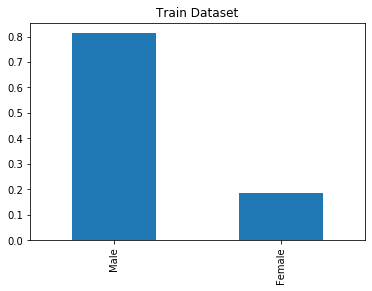

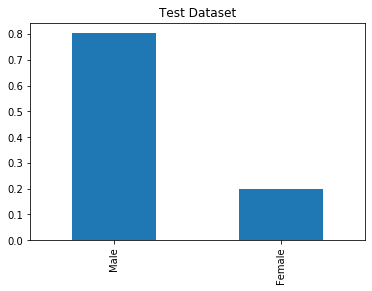

In [7]:
ax1 = train_df['Gender'].value_counts(normalize=True).plot.bar(title='Train Dataset')
plt.show()
ax2 = test_df['Gender'].value_counts(normalize=True).plot.bar(title='Test Dataset')
plt.show()

In [8]:
#Since Majority of applicants are male, assigning the value male to missing values
train_df['Gender'] = train_df['Gender'].fillna("Male")
test_df['Gender'] = test_df['Gender'].fillna("Male")

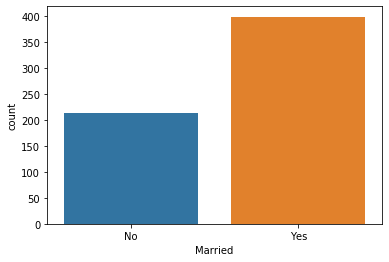

In [9]:
sns.countplot(train_df['Married']);

In [10]:
#Same thing with Married
train_df['Married'] = train_df['Married'].fillna("Yes")
test_df['Married'] = test_df['Married'].fillna("Yes")

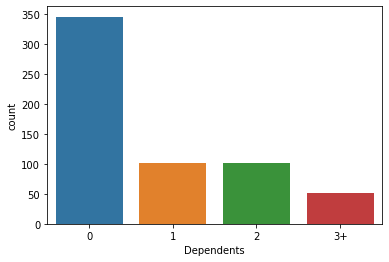

In [12]:
sns.countplot(train_df['Dependents']);

In [13]:
train_df['Dependents'] = train_df['Dependents'].fillna(0)
test_df['Dependents'] = test_df['Dependents'].fillna(0)

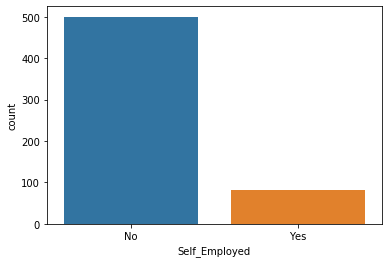

In [14]:
sns.countplot(train_df['Self_Employed']);

In [15]:
train_df['Self_Employed'] = train_df['Self_Employed'].fillna('No')
test_df['Self_Employed'] = test_df['Self_Employed'].fillna('No')

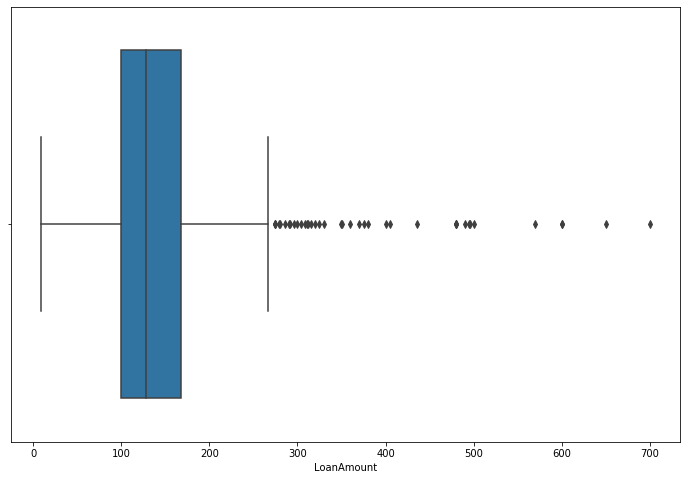

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(train_df['LoanAmount']);
train_df['LoanAmount']= train_df['LoanAmount'].fillna(150)

In [17]:
test_df['LoanAmount']= test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean())

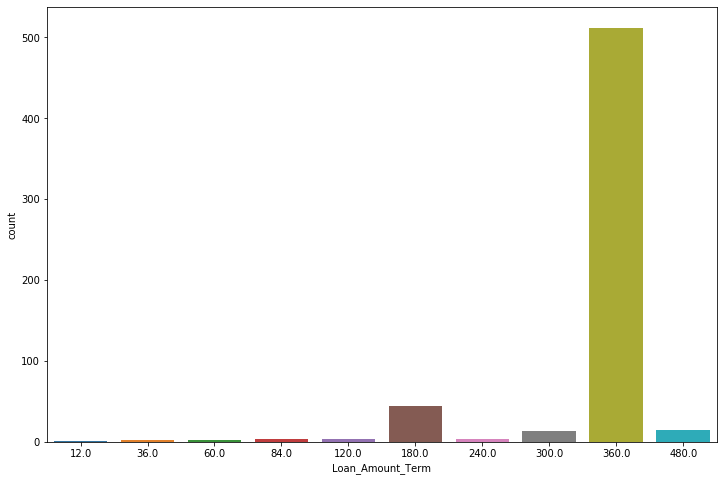

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(train_df['Loan_Amount_Term']);

In [19]:
train_df['Loan_Amount_Term']= train_df['Loan_Amount_Term'].fillna(360)

In [20]:
test_df['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.861496
180.0    0.060942
480.0    0.022161
300.0    0.019391
240.0    0.011080
84.0     0.008310
6.0      0.002770
120.0    0.002770
36.0     0.002770
350.0    0.002770
12.0     0.002770
60.0     0.002770
Name: Loan_Amount_Term, dtype: float64

In [21]:
test_df['Loan_Amount_Term']= test_df['Loan_Amount_Term'].fillna(360)

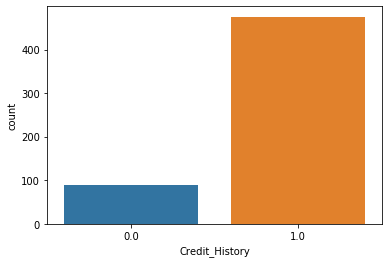

In [22]:
sns.countplot(train_df['Credit_History'])

In [23]:
train_df['Credit_History'] = train_df['Credit_History'].fillna(1.0)

In [24]:
test_df['Credit_History'].value_counts(normalize=True)

1.0    0.825444
0.0    0.174556
Name: Credit_History, dtype: float64

In [25]:
test_df['Credit_History'] = test_df['Credit_History'].fillna(1.0)

In [26]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

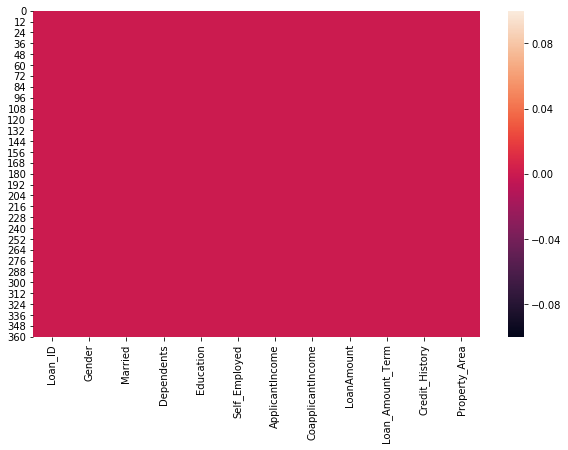

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(test_df.isnull());

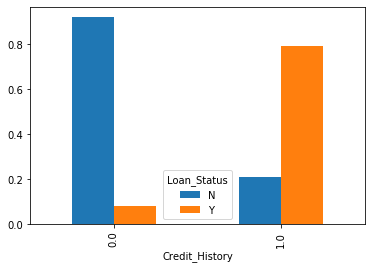

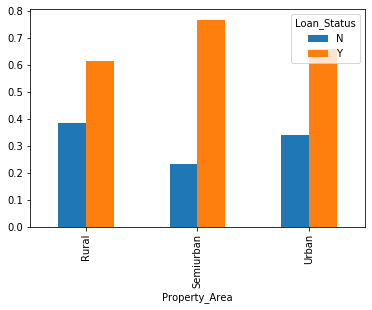

In [28]:
Credit_History=pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
Property_Area=pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False,)
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.show()

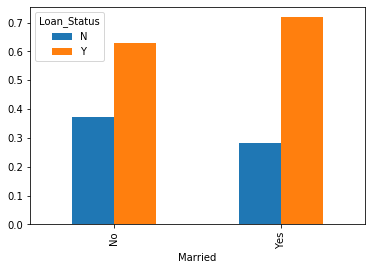

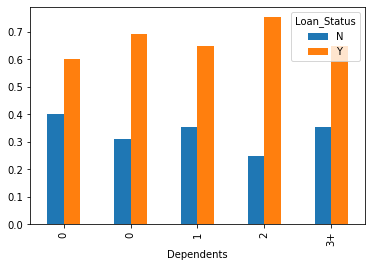

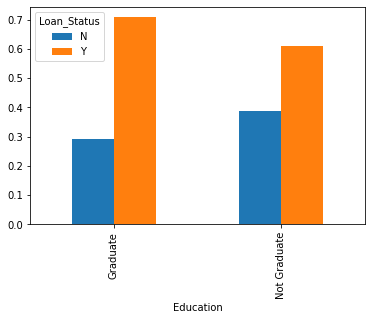

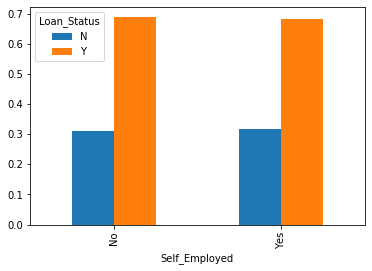

In [29]:
Married=pd.crosstab(train_df['Married'],train_df['Loan_Status'])
Dependents=pd.crosstab(train_df['Dependents'],train_df['Loan_Status'])
Education=pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Self_Employed=pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=False)
plt.show()

# Converting Categorical Variables/Strings to Integer 

In [30]:
df_unique = train_df.nunique()
df_unique

Loan_ID              614
Gender                 2
Married                2
Dependents             5
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [31]:
#Binary variables
binary_variable = list(df_unique[df_unique==2].index)
binary_variable

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Loan_Status']

In [32]:
#categorical variables with multiple categories that is greater than 2 (binary)
categorical_variables = list(df_unique[(df_unique>2)&(df_unique <=6)].index)
train_df[categorical_variables].nunique()

Dependents       5
Property_Area    3
dtype: int64

In [33]:
train_df['Gender'] = train_df['Gender'].replace(['Male','Female'],[1,0])
train_df['Married'] = train_df['Married'].replace(['Yes','No'],[1,0])
train_df['Dependents'] = train_df['Dependents'].replace(['0','1','2'],[0,1,2])
train_df['Dependents'] = train_df['Dependents'].replace('3+' , 3)
train_df['Education'] = train_df['Education'].replace(['Graduate' , 'Not Graduate'],[1,0])
train_df['Self_Employed'] = train_df['Self_Employed'].replace(['Yes','No'],[1,0])
train_df['Property_Area'] = train_df['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])
train_df['Loan_Status'] = train_df['Loan_Status'].replace(['Y','N'],[1,0])

In [34]:
test_df['Gender'] = test_df['Gender'].replace(['Male','Female'],[1,0])
test_df['Married'] = test_df['Married'].replace(['Yes','No'],[1,0])
test_df['Dependents'] = test_df['Dependents'].replace(['0','1','2'],[0,1,2])
test_df['Dependents'] = test_df['Dependents'].replace('3+' , 3)
test_df['Education'] = test_df['Education'].replace(['Graduate' , 'Not Graduate'],[1,0])
test_df['Self_Employed'] = test_df['Self_Employed'].replace(['Yes','No'],[1,0])
test_df['Property_Area'] = test_df['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

In [64]:
X = train_df.drop("Loan_Status", axis=1)
y=train_df['Loan_Status']

In [65]:
X = X.drop('Loan_ID',axis=1)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
          k_features=10, 
          forward=False,
          floating= False,
          verbose = 2,
          scoring='accuracy',
          cv=4,
          n_jobs=-1
         
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    1.0s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.1s finished

[2021-04-28 15:14:30] Features: 10/10 -- score: 0.8223158195316961

In [74]:
sfs.k_feature_names_

('Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area')

In [75]:
y.value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [76]:
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [77]:
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: Loan_Status, dtype: float64

# 1) With Grandient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [79]:
parameters = {'learning_rate': [ 0.5, 0.2, 0.1, 0.01, 0.001], 
              'subsample':[1.0, 0.5,0.2], 
              'max_features':[4, 5, 10, 12, 19],
              'n_estimators':[15, 20, 30, 40, 80, 100, 200, 400]
             }

GB = GridSearchCV(GradientBoostingClassifier(random_state=142), param_grid=parameters, scoring='accuracy', n_jobs=-1)
GB = GB.fit(X_train, y_train)
y_predGB = GB.predict(X_test)

GB.best_params_

{'learning_rate': 0.01,
 'max_features': 10,
 'n_estimators': 80,
 'subsample': 1.0}

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



# 2) With Adaboost¶

In [83]:
parameters = {'learning_rate': [ 0.5, 0.2, 0.1, 0.01, 0.001], 
              #'subsample':[1.0, 0.5,0.2], 
              #'max_features':[4, 5, 10, 12, 19],
              'n_estimators':[15, 20, 30, 40, 80, 100, 200, 400]
             }

AB = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, scoring='accuracy', n_jobs=-1)
AB = AB.fit(X_train,y_train)
y_predAB = AB.predict(X_test)

GB.best_params_

{'learning_rate': 0.01,
 'max_features': 10,
 'n_estimators': 80,
 'subsample': 1.0}

In [84]:
print(classification_report(y_test,y_predAB))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



# 3) With Logistic Regression penalty L2

In [85]:
from sklearn.linear_model import LogisticRegression

L2 = LogisticRegression(penalty='l2',solver='saga', max_iter=700)
L2 = L2.fit(X_train,y_train)

y_predl2 = L2.predict(X_test)

print(classification_report(y_test,y_predl2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.65      1.00      0.78       131

    accuracy                           0.65       203
   macro avg       0.32      0.50      0.39       203
weighted avg       0.42      0.65      0.51       203



In [86]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train,y_train)

params_grid = {'max_depth':range(1, DT.tree_.max_depth+1, 2),
               'max_features':range(1,len(DT.feature_importances_)+1)
              }

DT_GV = GridSearchCV(DecisionTreeClassifier(random_state=101),
                   param_grid=params_grid,
                   scoring='accuracy',
                   n_jobs=-1)

DT_GV = DT_GV.fit(X_train,y_train)
y_predDT = DT_GV.predict(X_test)
DT_GV.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=9, random_state=101)

[Text(0, 0.5, 'Relative_Importance')]

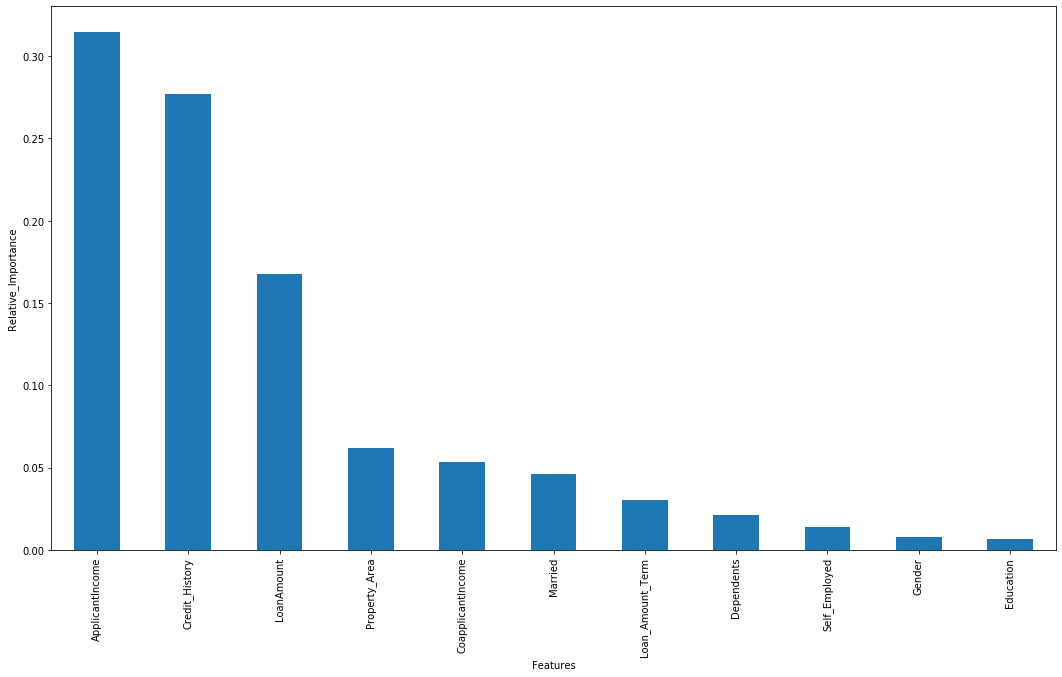

In [87]:
Feature_importance = pd.Series(DT.feature_importances_, index=[x for x in X]).sort_values(ascending=False)
bar = Feature_importance.plot(kind='bar', figsize=(18,10))
bar.set(xlabel='Features')
bar.set(ylabel='Relative_Importance')

# 5) Stacking all these up with Voting classifier for final prediction - Gradient Boosting + Adaboost + L2 Reg + DT

In [88]:
from sklearn.ensemble import VotingClassifier

classifiers = [('GB', GB),('AB', AB), ('L2', L2), ('DT_GV', DT_GV) ]

VC = VotingClassifier(classifiers,voting='soft')

VC = VC.fit(X_train,y_train)
y_predvc = VC.predict(X_test)

print(classification_report(y_test,y_predvc))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



(2, 0)

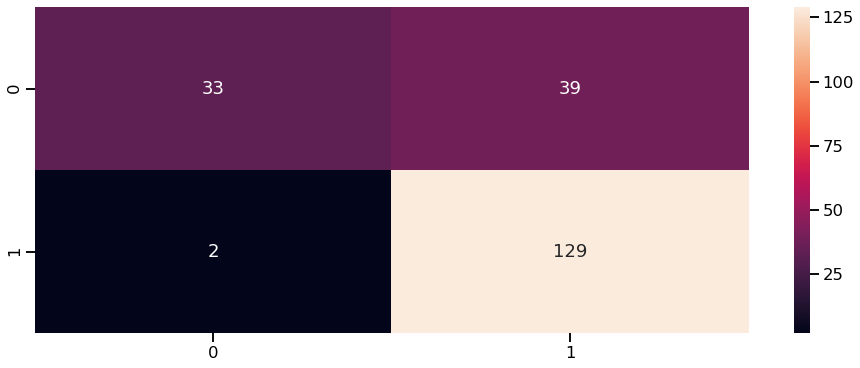

In [89]:
cm = confusion_matrix(y_test,y_predvc)
plt.figure(figsize=(16,6))
sns.set_context("talk")
#sns.heatmap(cm/np.sum(cm),annot=True, cmap='coolwarm',fmt='.2%')
sns.heatmap(cm,annot=True,fmt='d')
plt.ylim(2,0)